# Obtención de los datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [3]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


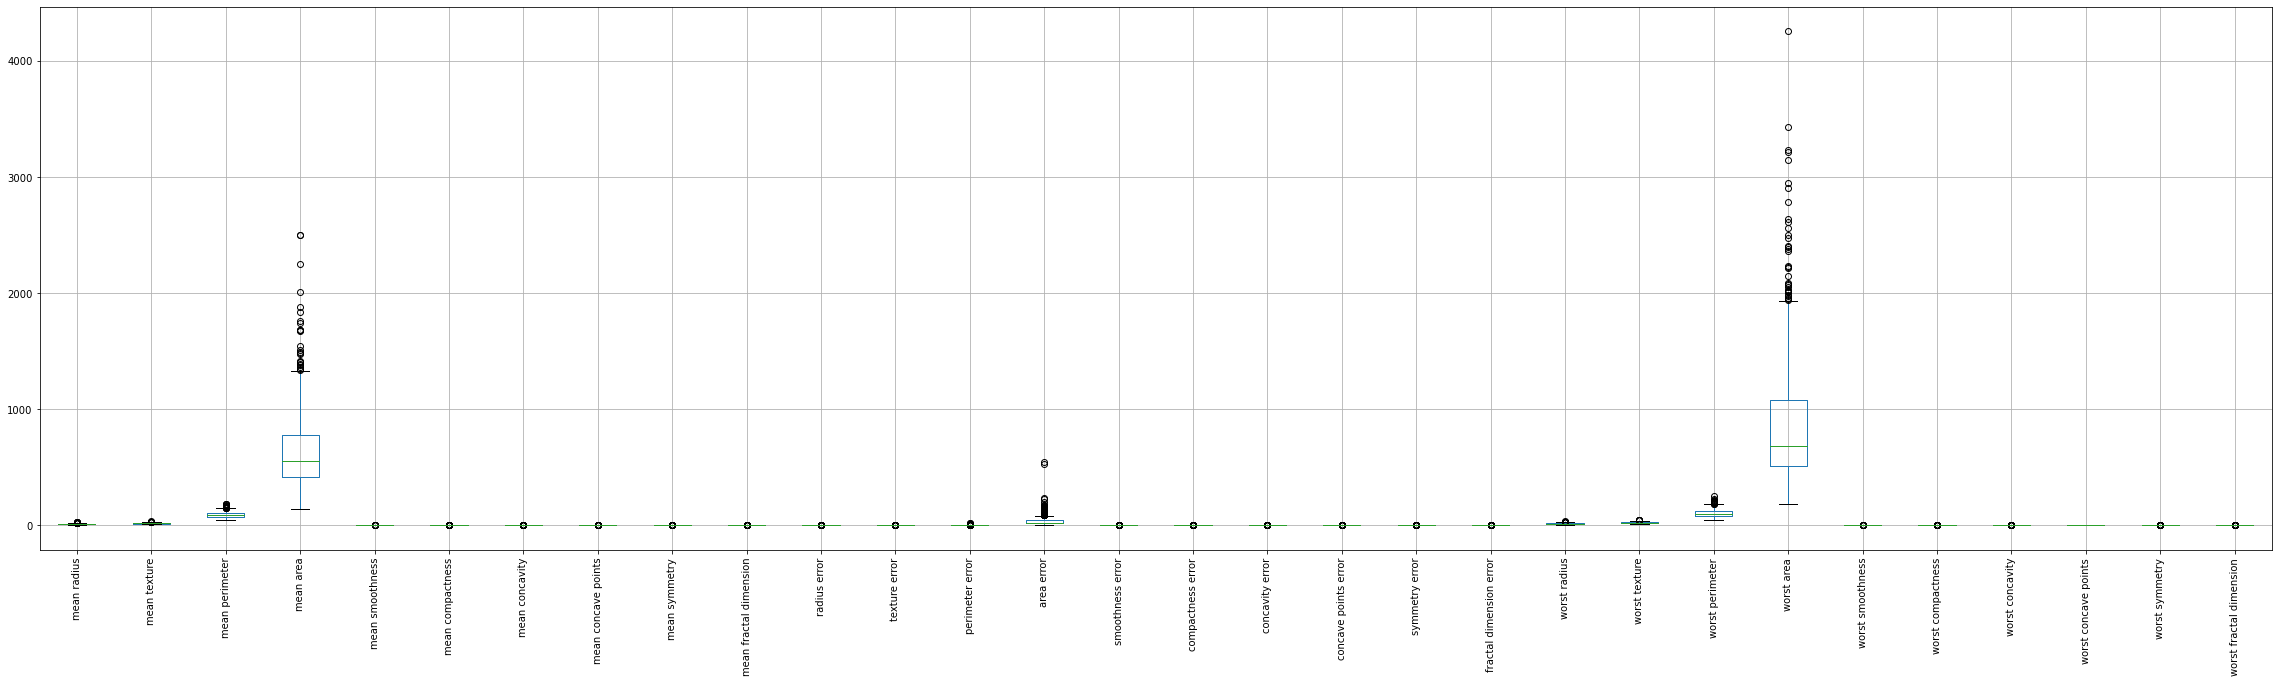

In [5]:
df.boxplot(figsize=(40,10))
plt.xticks(rotation = 90)
plt.show()

In [6]:
y = pd.Series(data.target)
y.value_counts()

1    357
0    212
dtype: int64

# Preparación de los datos.

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

### Escalamiento de los datos.

In [8]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns = df.columns) 

In [9]:
scaled_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


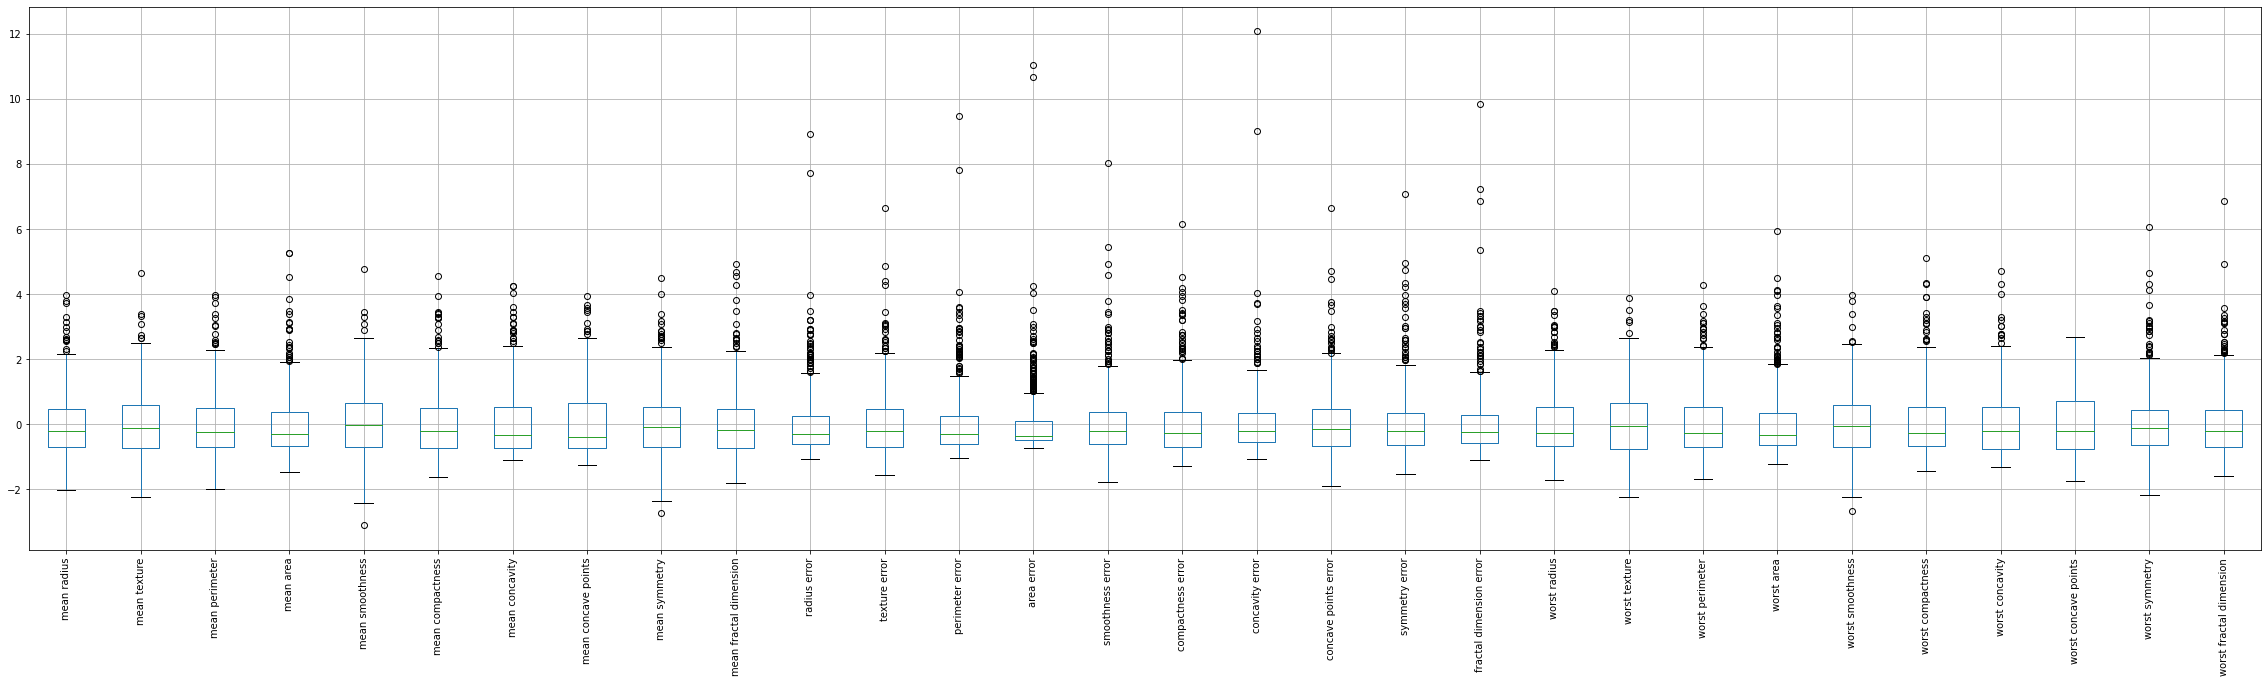

In [10]:
scaled_df.boxplot(figsize=(40,10))
plt.xticks(rotation = 90)
plt.show()

### Normalización de los datos.

In [11]:
normalized_df = normalize(scaled_df)
normalized_df = pd.DataFrame(normalized_df, columns = df.columns) 

In [12]:
normalized_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.102429,-0.193580,0.118569,0.091908,0.146442,0.306571,0.247690,0.236449,0.207042,0.210612,...,0.176154,-0.126913,0.215080,0.186849,0.122094,0.244309,0.196959,0.214377,0.256816,0.180853
1,0.356555,-0.068908,0.328522,0.371927,-0.161140,-0.094910,-0.004647,0.106810,0.000271,-0.169264,...,0.351899,-0.071942,0.299132,0.368377,-0.073191,-0.083876,-0.028595,0.211827,-0.047524,0.054792
2,0.258207,0.074556,0.256019,0.254774,0.153989,0.172083,0.222838,0.332952,0.153576,-0.065048,...,0.247090,-0.003918,0.220223,0.238006,0.086196,0.176987,0.139731,0.319513,0.188317,0.032914
3,-0.054977,0.018142,-0.042377,-0.054659,0.234774,0.243308,0.136986,0.103797,0.205017,0.351130,...,-0.020125,0.009580,-0.017871,-0.039326,0.242690,0.278377,0.142255,0.155568,0.432291,0.352853
4,0.298304,-0.196304,0.302782,0.311245,0.047784,0.091920,0.233662,0.243458,-0.001629,-0.095859,...,0.221317,-0.249982,0.228128,0.208048,0.037589,-0.053412,0.104504,0.124288,-0.147994,-0.067678


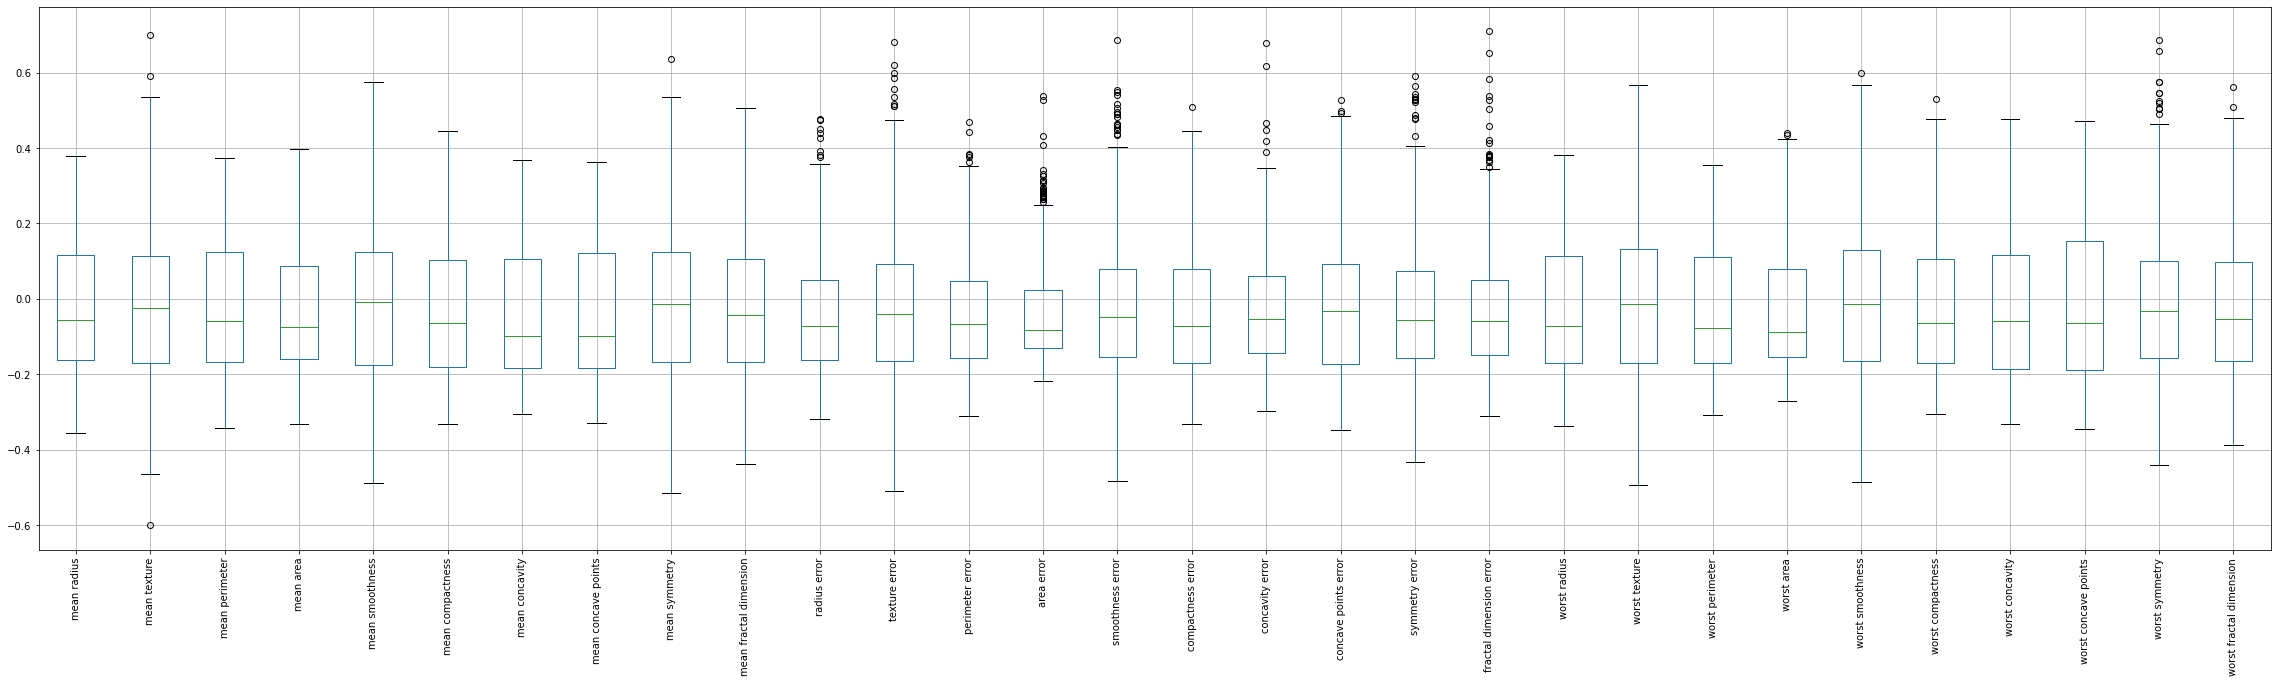

In [13]:
normalized_df.boxplot(figsize=(40,10))
plt.xticks(rotation = 90)
plt.show()

# Análisis de Componentes Principales (PCA)
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components = 2) 
x_principal = pca.fit_transform(normalized_df) 
x_principal = pd.DataFrame(x_principal)
x_principal.columns = ['P1', 'P2'] 
x_principal.head()

,P1,P2
0,0.969402,0.225738
1,0.591894,-0.720061
2,1.065239,-0.155337
3,0.652376,0.757220
4,0.773165,-0.287872


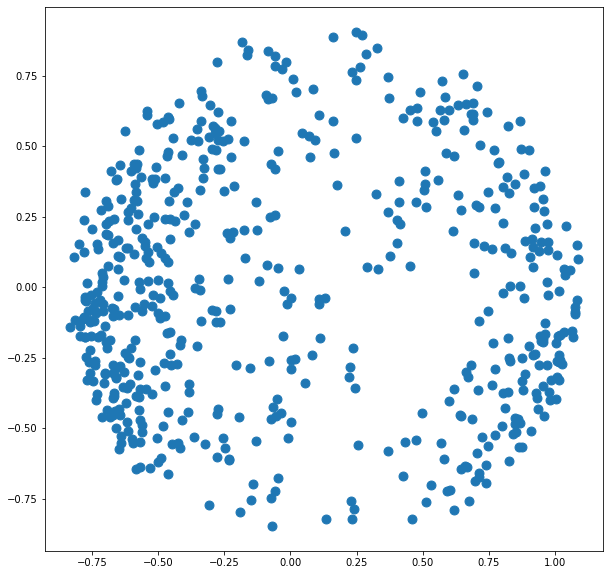

In [16]:
fig = plt.figure(figsize = (10,10))
plt.scatter(x_principal['P1'], x_principal['P2'], s = 80)
plt.show()

# Algoritmo K-Means.
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [17]:
from sklearn.cluster import KMeans

In [18]:
n_clusters = 2
km = KMeans(n_clusters = n_clusters)
km.fit(normalized_df);

In [19]:
y_predict = km.predict(normalized_df)

In [20]:
y_predict = pd.Series(y_predict)
y_predict.value_counts()

0    348
1    221
dtype: int64

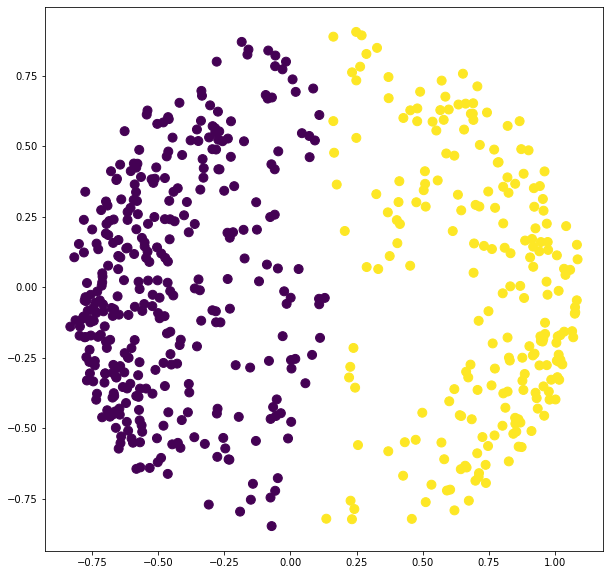

In [21]:
fig = plt.figure(figsize = (10,10))
plt.scatter(x_principal['P1'], x_principal['P2'], c = y_predict, s = 80)
plt.show()

# Matriz de confusión para verificar el desempeño.

In [25]:
from sklearn.metrics import confusion_matrix

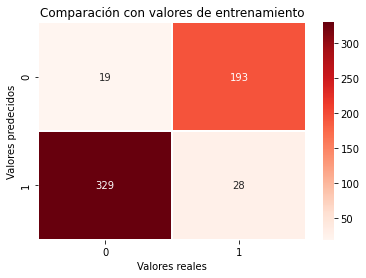

In [26]:
cm = confusion_matrix(y, y_predict)
sns.heatmap(cm, linewidth = 0.5, annot = True, cmap = 'Reds', fmt = 'g')
plt.ylabel('Valores predecidos')
plt.xlabel('Valores reales')
plt.title('Comparación con valores de entrenamiento')
plt.show()

# Reporte de clasificación.

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y, y_predict))

              precision    recall  f1-score   support

           0       0.05      0.09      0.07       212
           1       0.13      0.08      0.10       357

    accuracy                           0.08       569
   macro avg       0.09      0.08      0.08       569
weighted avg       0.10      0.08      0.09       569



# Las etiquetas encontradas por el algoritmo no coinciden con nuestras etiquetas originales.

In [28]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Length: 569, dtype: int32


In [29]:
print(y_predict)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Length: 569, dtype: int32


In [30]:
predicted_labels = np.zeros_like(y_predict)
print(predicted_labels)
print(predicted_labels.size)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [31]:
from scipy.stats import mode

for i in range(2):
    mask = (y_predict == i)
    predicted_labels[mask] = mode(y[mask])[0]
    
print(predicted_labels)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1
 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1
 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0
 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 0 1 1 1 1 0 

# Matriz de confusión para verificar el desempeño.

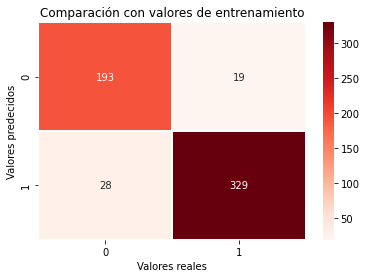

In [32]:
cm = confusion_matrix(y, predicted_labels)
sns.heatmap(cm, linewidth = 0.5, annot = True, cmap = 'Reds', fmt = 'g')
plt.ylabel('Valores predecidos')
plt.xlabel('Valores reales')
plt.title('Comparación con valores de entrenamiento')
plt.show()

# Reporte de clasificación.

In [33]:
print(classification_report(y, predicted_labels))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       212
           1       0.95      0.92      0.93       357

    accuracy                           0.92       569
   macro avg       0.91      0.92      0.91       569
weighted avg       0.92      0.92      0.92       569



# Agreguemos nuestra clasificación al df original.

In [34]:
df['cluster'] = predicted_labels
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cluster
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


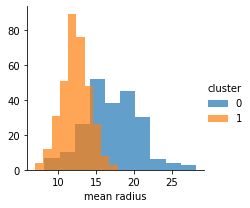

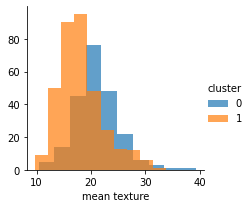

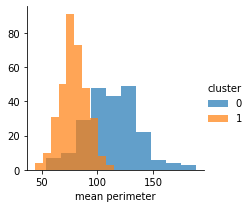

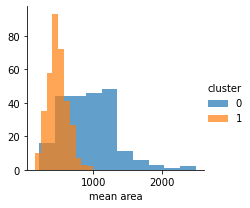

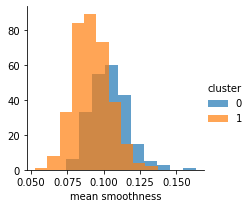

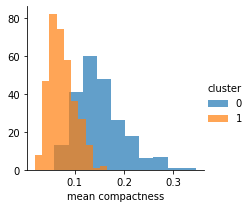

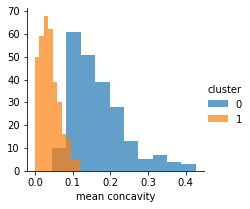

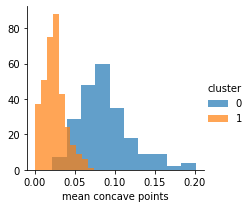

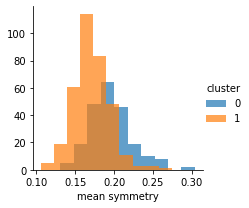

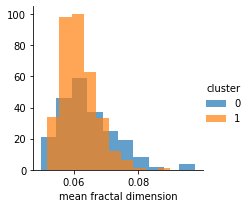

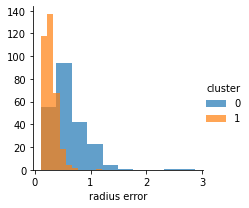

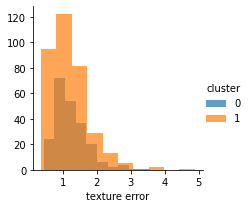

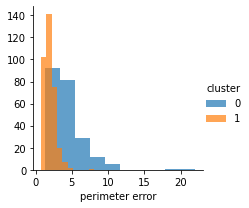

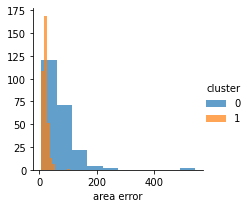

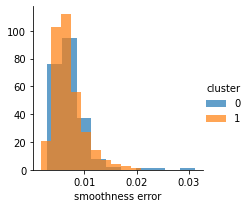

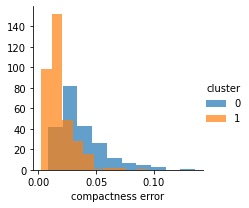

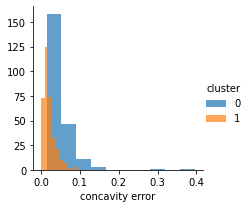

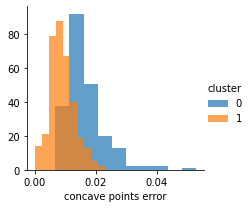

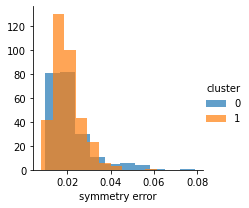

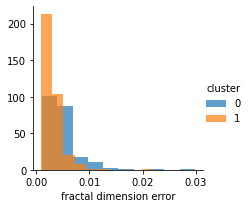

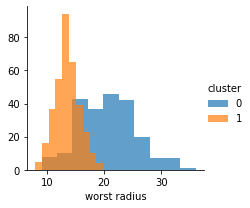

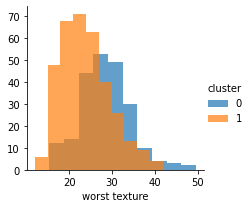

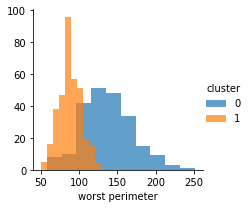

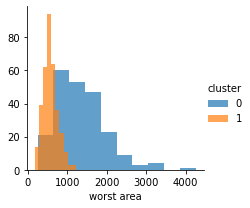

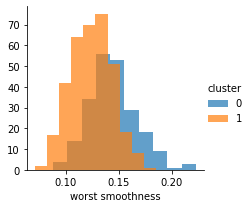

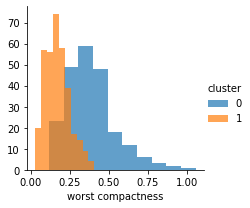

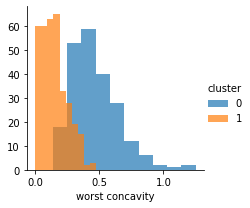

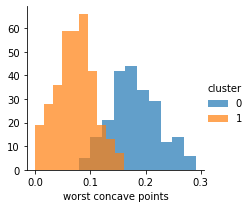

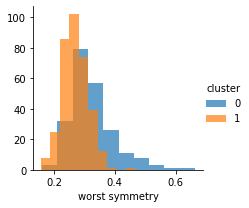

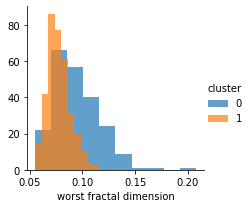

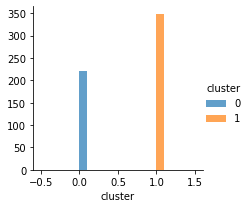

In [35]:
for column in df:
    grid= sns.FacetGrid(df, hue="cluster")
    grid.map(plt.hist, column, alpha = 0.7).add_legend()
    
plt.show();